In [3]:
# import nec
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import json
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
awair_csv_data = pd.read_csv("../1awair_data.csv")

In [9]:
awair_csv_data.dtypes

timestamp            object
score                 int64
dew_point           float64
temp                float64
humid               float64
abs_humid           float64
co2                   int64
co2_est               int64
co2_est_baseline      int64
voc                   int64
voc_baseline          int64
voc_h2_raw            int64
voc_ethanol_raw       int64
pm25                  int64
pm10_est              int64
location             object
dtype: object

In [59]:
awair_csv_data.head()

,timestamp,score,dew_point,temp,humid,abs_humid,co2,co2_est,co2_est_baseline,voc,voc_baseline,voc_h2_raw,voc_ethanol_raw,pm25,pm10_est,location
0,2023-06-23T19:59:49.103Z,95,13.19,25.45,46.61,10.98,590,585,35820,140,37636,25,36,1,2,"Janonhanta1,Vantaa,Finland"
1,2023-06-23T20:04:49.324Z,95,13.19,25.40,46.76,10.98,584,579,35820,135,37636,25,36,1,2,"Janonhanta1,Vantaa,Finland"
2,2023-06-23T20:09:49.539Z,95,13.15,25.40,46.64,10.95,587,567,35819,136,37636,25,36,2,3,"Janonhanta1,Vantaa,Finland"
3,2023-06-23T20:14:49.752Z,95,13.15,25.42,46.56,10.95,584,595,35818,144,37636,25,36,1,2,"Janonhanta1,Vantaa,Finland"
4,2023-06-23T20:19:49.967Z,95,13.08,25.33,46.64,10.91,582,589,35817,147,37636,25,36,2,3,"Janonhanta1,Vantaa,Finland"


In [60]:
selected_required_columns = awair_csv_data[['temp','humid','co2','voc','pm25']]

In [61]:
selected_required_columns.head()

,temp,humid,co2,voc,pm25
0,25.45,46.61,590,140,1
1,25.40,46.76,584,135,1
2,25.40,46.64,587,136,2
3,25.42,46.56,584,144,1
4,25.33,46.64,582,147,2


In [63]:
# selected_required_columns['timestamp'] = pd.to_datetime(selected_required_columns['timestamp']).dt.strftime('%d/%m/%Y %H:%M')

In [64]:
selected_required_columns

,temp,humid,co2,voc,pm25
0,25.45,46.61,590,140,1
1,25.40,46.76,584,135,1
2,25.40,46.64,587,136,2
3,25.42,46.56,584,144,1
4,25.33,46.64,582,147,2
...,...,...,...,...,...
5177,24.81,49.45,669,108,1
5178,24.86,49.15,658,103,2
5179,25.00,49.07,654,99,2
5180,24.86,49.35,658,98,3


In [65]:
# selected_required_columns.rename(columns = {'timestamp':'DateTime', 'temp':'Temp',
#                               'humid':'Humid', 'co2':'Co2', 'voc':'Voc', 'pm25':'Pm25', 'location':'Location'},
#                                  inplace = True)

In [68]:
# check data type
print(selected_required_columns.dtypes)

temp     float64
humid    float64
co2        int64
voc        int64
pm25       int64
dtype: object


In [69]:
# Check for missing values
print(selected_required_columns.isna().sum())

temp     0
humid    0
co2      0
voc      0
pm25     0
dtype: int64


In [70]:
# Check for duplicate rows
print(selected_required_columns.duplicated().sum())

0


In [71]:
# Drop duplicate rows
selected_required_columns = selected_required_columns.drop_duplicates()

In [73]:
selected_required_columns

,temp,humid,co2,voc,pm25
0,25.45,46.61,590,140,1
1,25.40,46.76,584,135,1
2,25.40,46.64,587,136,2
3,25.42,46.56,584,144,1
4,25.33,46.64,582,147,2
...,...,...,...,...,...
5177,24.81,49.45,669,108,1
5178,24.86,49.15,658,103,2
5179,25.00,49.07,654,99,2
5180,24.86,49.35,658,98,3


In [74]:
# Calculate summary statistics
summary_stats = selected_required_columns.describe()
summary_stats

,temp,humid,co2,voc,pm25
count,5182.000000,5182.000000,5182.000000,5182.000000,5182.000000
mean,25.204338,50.281839,572.974141,125.838865,3.734272
std,0.769682,4.874117,90.772588,77.158903,6.245803
min,23.480000,35.600000,400.000000,20.000000,0.000000
25%,24.630000,46.882500,501.000000,89.000000,1.000000
50%,25.130000,50.450000,571.000000,118.000000,2.000000
75%,25.850000,54.127500,643.000000,150.000000,4.000000
max,27.090000,61.140000,897.000000,2192.000000,115.000000


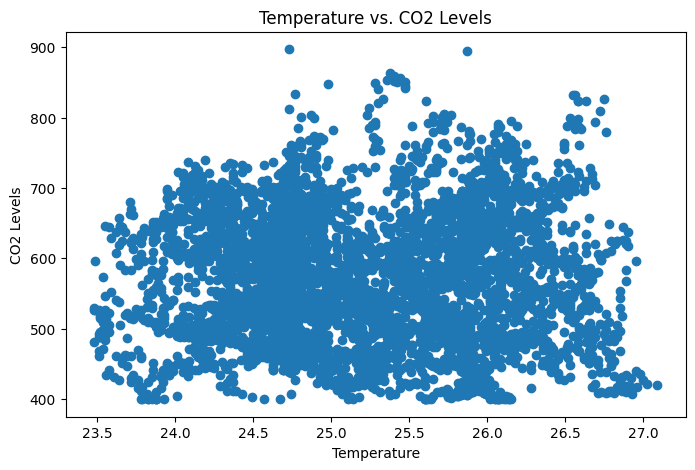

In [76]:
# Visualize temperature and CO2 levels using scatter plot
plt.figure(figsize=(8,5))
plt.scatter(selected_required_columns['temp'], selected_required_columns['co2'])
plt.xlabel('Temperature')
plt.ylabel('CO2 Levels')
plt.title('Temperature vs. CO2 Levels')

plt.show()

In [78]:
# Calculate correlation between temperature and humidity
correlation = selected_required_columns['temp'].corr(selected_required_columns['humid'])
correlation

0.018122950520373493

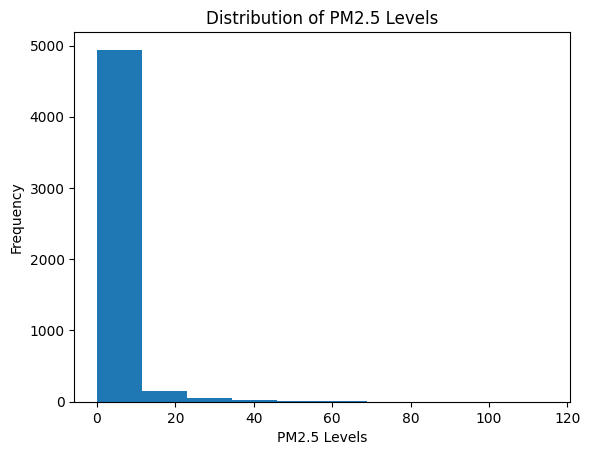

In [79]:
# Create a histogram of PM2.5 levels
plt.hist(selected_required_columns['pm25'], bins=10)
plt.xlabel('PM2.5 Levels')
plt.ylabel('Frequency')
plt.title('Distribution of PM2.5 Levels')
plt.show()

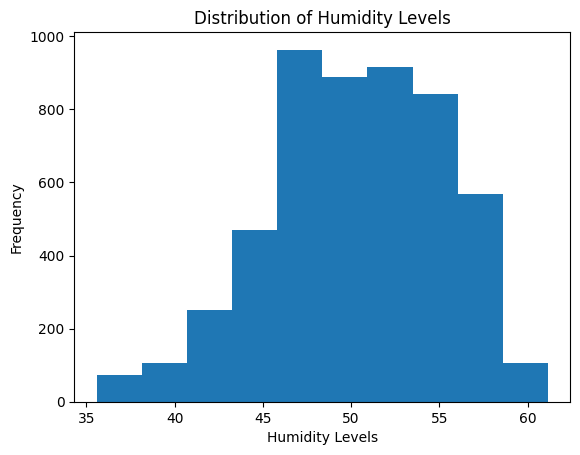

In [80]:
# Create a histogram of Humidity levels
plt.hist(selected_required_columns['humid'], bins=10)
plt.xlabel('Humidity Levels')
plt.ylabel('Frequency')
plt.title('Distribution of Humidity Levels')
plt.show()

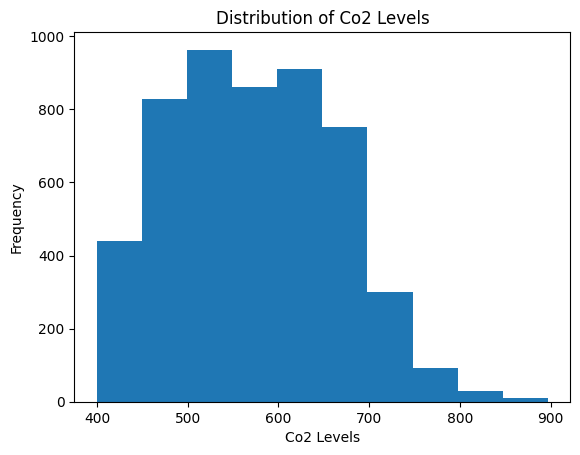

In [81]:
# Create a histogram of Humidity levels
plt.hist(selected_required_columns['co2'], bins=10)
plt.xlabel('Co2 Levels')
plt.ylabel('Frequency')
plt.title('Distribution of Co2 Levels')
plt.show()

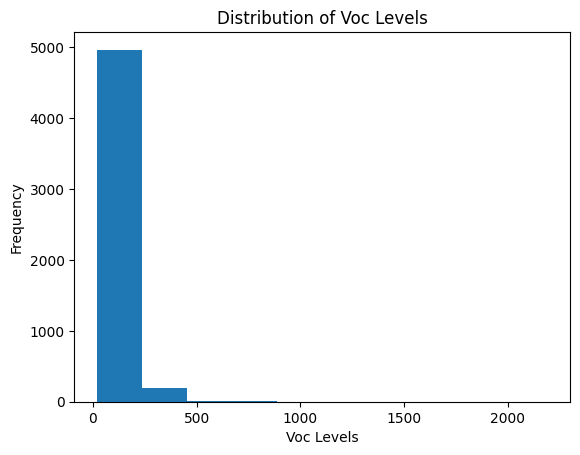

In [82]:
# Create a histogram of Humidity levels
plt.hist(selected_required_columns['voc'], bins=10)
plt.xlabel('Voc Levels')
plt.ylabel('Frequency')
plt.title('Distribution of Voc Levels')
plt.show()

In [83]:
correlation_matrix = selected_required_columns.corr()
print(correlation_matrix)

           temp     humid       co2       voc      pm25
temp   1.000000  0.018123  0.022436  0.300013  0.249723
humid  0.018123  1.000000  0.547611  0.254569 -0.066404
co2    0.022436  0.547611  1.000000  0.437308 -0.061395
voc    0.300013  0.254569  0.437308  1.000000  0.113135
pm25   0.249723 -0.066404 -0.061395  0.113135  1.000000


<Axes: >

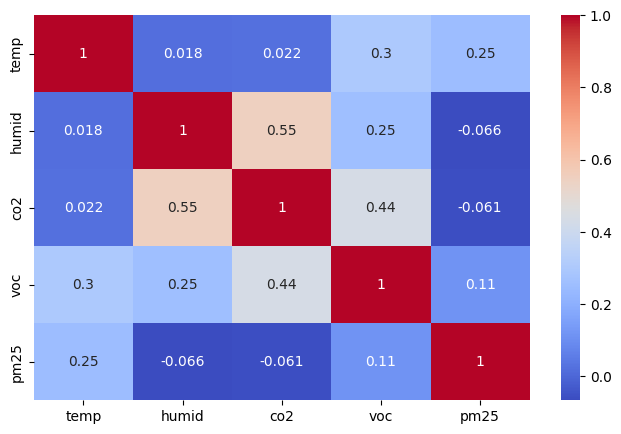

In [84]:
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

<Figure size 800x500 with 0 Axes>

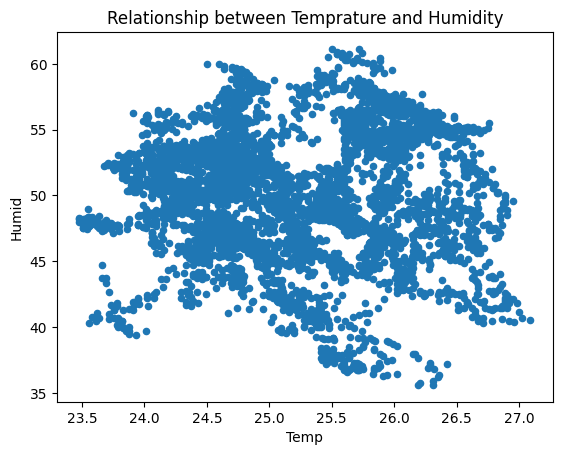

In [85]:
plt.figure(figsize=(8,5))
selected_required_columns.plot(x='temp', y='humid', kind='scatter')
plt.xlabel('Temp')
plt.ylabel('Humid')
plt.title('Relationship between Temprature and Humidity')
plt.show()